In [166]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import random

In [167]:
data=pd.read_csv('datasets/Heart.csv')
print(data)

     Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1       typical     145   233    1        2    150   
1             2   67    1  asymptomatic     160   286    0        2    108   
2             3   67    1  asymptomatic     120   229    0        2    129   
3             4   37    1    nonanginal     130   250    0        0    187   
4             5   41    0    nontypical     130   204    0        2    172   
..          ...  ...  ...           ...     ...   ...  ...      ...    ...   
298         299   45    1       typical     110   264    0        0    132   
299         300   68    1  asymptomatic     144   193    1        0    141   
300         301   57    1  asymptomatic     130   131    0        0    115   
301         302   57    0    nontypical     130   236    0        2    174   
302         303   38    1    nonanginal     138   175    0        0    173   

     ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0        0  

In [168]:
#filter out dataset using .csv file
data=np.array(data)

one=np.array([1 for i in range(len(data))])
dataset=np.array([one,data[:,4],data[:,5]])

#data normalization
dataset[1] = np.array((dataset[1] - dataset[1].min()) / (dataset[1].max() - dataset[1].min()),dtype=np.float32)
dataset[2] = np.array((dataset[2] - dataset[2].min()) / (dataset[2].max() - dataset[2].min()),dtype=np.float32)

dataset=dataset.T
print(dataset)

[[1 0.4811320900917053 0.2442922443151474]
 [1 0.6226415038108826 0.3652968108654022]
 [1 0.24528302252292633 0.23515981435775757]
 [1 0.3396226465702057 0.2831050157546997]
 [1 0.3396226465702057 0.1780821979045868]
 [1 0.24528302252292633 0.2511415481567383]
 [1 0.43396225571632385 0.32420089840888977]
 [1 0.24528302252292633 0.5205479264259338]
 [1 0.3396226465702057 0.29223743081092834]
 [1 0.43396225571632385 0.17579908668994904]
 [1 0.43396225571632385 0.15068493783473969]
 [1 0.43396225571632385 0.3835616409778595]
 [1 0.3396226465702057 0.29680365324020386]
 [1 0.24528302252292633 0.31278538703918457]
 [1 0.7358490824699402 0.1666666716337204]
 [1 0.5283018946647644 0.09589041024446487]
 [1 0.15094339847564697 0.23515981435775757]
 [1 0.43396225571632385 0.25799086689949036]
 [1 0.3396226465702057 0.34018266201019287]
 [1 0.3396226465702057 0.31963470578193665]
 [1 0.15094339847564697 0.1940639317035675]
 [1 0.5283018946647644 0.35844749212265015]
 [1 0.24528302252292633 0.3607

In [169]:
#taking y labels (No=0, Yes=1)
y=np.array(data[:,14])
le=LabelEncoder()
y=le.fit_transform(y)
for i in range(len(y)):
    if y[i]==0:
        y[i]=-1
print(y)

[-1  1  1 -1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1
  1 -1 -1 -1 -1  1 -1  1  1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1  1  1 -1  1
 -1 -1 -1 -1  1 -1  1  1  1  1 -1 -1  1 -1  1 -1  1  1  1 -1  1  1 -1  1
  1  1  1 -1  1 -1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1
  1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1 -1  1  1
  1  1 -1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1  1
 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1
  1 -1  1 -1  1 -1  1  1 -1  1 -1 -1  1  1 -1 -1  1 -1 -1  1  1  1 -1  1
  1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1  1 -1  1  1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1  1 -1 -1  1  1  1 -1 -1
 -1 -1 -1  1 -1  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1
  1  1  1  1  1 -1  1 -1  1 -1  1 -1 -1 -1  1 -1  1 -1  1 -1  1  1  1 -1
 -1 -1  1 -1  1  1  1 -1  1  1  1  1  1  1 -1]


In [170]:
#splitting data into test and train set
train_set=np.array([dataset[0:int(0.75*len(dataset))-1,0],dataset[0:int(0.75*len(dataset))-1,1],dataset[0:int(0.75*len(dataset))-1,2]])
train_set=train_set.T
test_set=np.array([dataset[int(0.75*len(dataset)):,0],dataset[int(0.75*len(dataset)):,1],dataset[int(0.75*len(dataset)):,2]])
test_set=test_set.T

y_train=y[0:int(0.75*len(dataset))-1]
y_test=y[int(0.75*len(dataset)):]

Text(0, 0.5, 'Cholestrol')

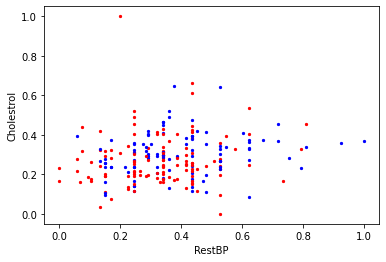

In [171]:
#plot the data
for i in range(len(train_set)):
    if y[i]==-1:
        plt.scatter(train_set[i,1],train_set[i,2],s=5,color='red',label='No')
    else:
        plt.scatter(train_set[i,1],train_set[i,2],s=5,color='blue',label='Yes')
plt.xlabel('RestBP')
plt.ylabel('Cholestrol')

In [172]:
def sigmoid(y,w,x):
    result=[]
    for i in range(len(y)):
        prob=1/(1+np.exp(y[i]*(np.dot(x[i],w))))
        result.append(prob)
    return result

In [173]:
def sigmoid_point(y,w,x):
    prob=1/(1+np.exp(y*(np.dot(x,w))))
    return prob

In [185]:
def cross_entropy_loss(y,y_predicted):
    loss = 0
    for i in range(len(y_predicted)):
        loss = loss + (-1 * y[i]*np.log(y_predicted[i])) + (-1 * (1-y[i])*np.log(1-y_predicted[i]))
    return loss

In [211]:
def logistic_regression(X,y):
    row,col=np.shape(X)
    w=[random.random() for i in range(col)]
    w=np.array(w,dtype=np.float32)
    y_predicted=sigmoid(y,w,X)
    loss=cross_entropy_loss(y,y_predicted)
    print("Initial loss:",loss)

    learning_rate=0.01
    epochs=0
    loss_curve=[loss]

    while(loss>1 and epochs<50000):
        for i in range(col):
            partialloss=np.array([0 for j in range(col)])
            #gradient descent algorithm
            for j in range(row):
                partialloss=partialloss+np.array(((X[j]*y[j])/sigmoid_point(-y[i],w,X[j])),dtype=np.float32)
            partialloss=partialloss/row
            w=w+learning_rate*partialloss
    
        #updating y_predicted values and hence finding loss
        y_predicted=sigmoid(y,w,X)
        loss=cross_entropy_loss(y,y_predicted)
        loss_curve.append(loss)
        epochs=epochs+1
    print("Final loss:",loss_curve[-1])

    return w,loss_curve

Initial loss: 330.5580521404231
Final loss: -0.12422094251116911
Final w: [-0.88861318 -0.1201646   0.76677198]


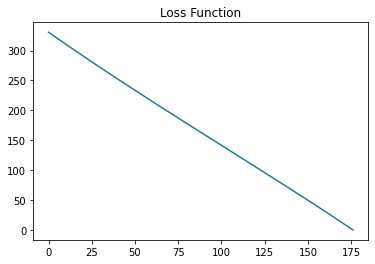

In [212]:
#call logistic regression function
w,loss_curve=logistic_regression(train_set,y_train)

print('Final w:',w)
plt.plot(loss_curve)
plt.title("Loss Function")
plt.autoscale()
plt.show()

In [214]:
#testing
model_y=sigmoid(y_test,w,test_set)
result=[]

for i in range(len(model_y)):
    if(model_y[i]>=0.5):
        result.append(1)
    else:
        result.append(-1)

#calculating accuracy of model
correct=0
incorrect=0

for i in range(len(result)):
    if y_test[i]==result[i]:
        correct+=1
    else:
        incorrect+=1

accuracy=100*(correct/(correct+incorrect))
print("Accuracy of the model:", accuracy)

Accuracy of the model: 100.0
